## Diabetes Prediction

In [597]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [598]:
# loading the dataset
df = pd.read_csv('diabetes.csv')

# General info

In [599]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [601]:
df.shape

(768, 9)

In [602]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [603]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Descriptive Statistics

In [604]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,122.242188,69.662760,20.536458,79.799479,31.992578,0.471876,33.308594,0.348958
std,3.369578,49.001676,24.827374,15.952218,115.244002,7.884160,0.331329,11.998145,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,1150.000000,500.000000,99.000000,846.000000,67.100000,2.420000,102.000000,1.000000


# Data Visualization

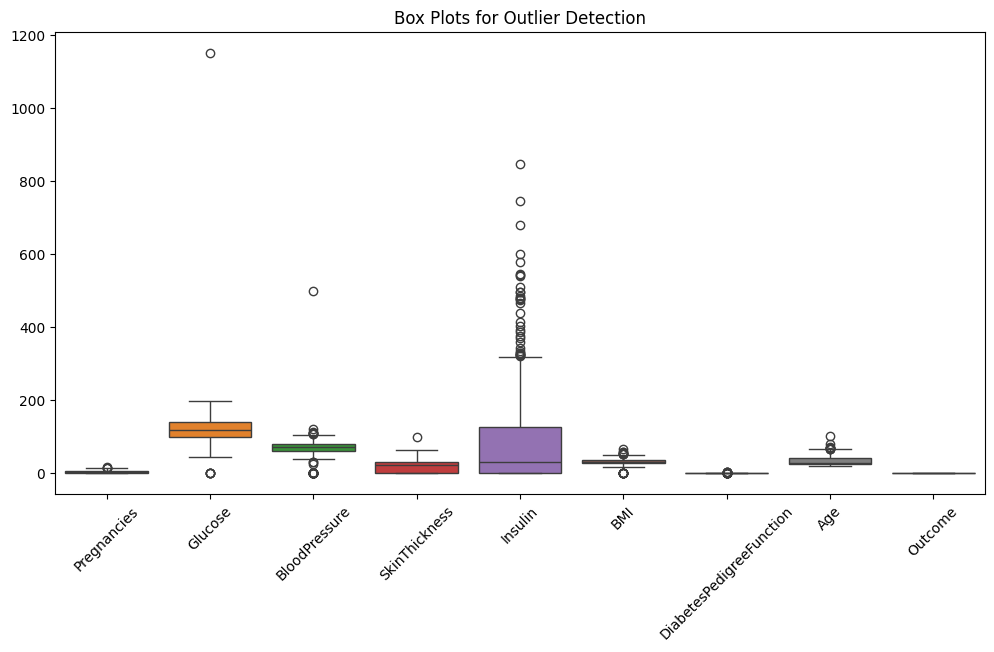

In [605]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df.select_dtypes(include = [np.number]))
plt.xticks(rotation = 45)
plt.title("Box Plots for Outlier Detection")
plt.show()

In [606]:
# handling outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include = [np.number])))
df = df[(z_scores < 3).all(axis = 1)]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
10,4,110,92,0,0,37.6,0.191,30,0


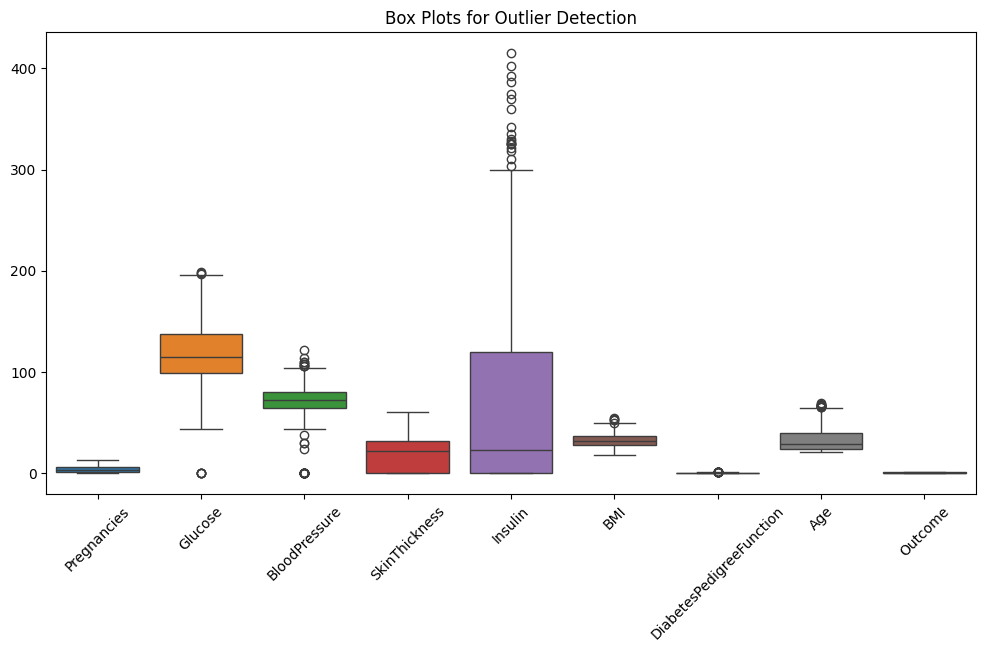

In [607]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df.select_dtypes(include = [np.number]))
plt.xticks(rotation = 45)
plt.title("Box Plots for Outlier Detection")
plt.show()

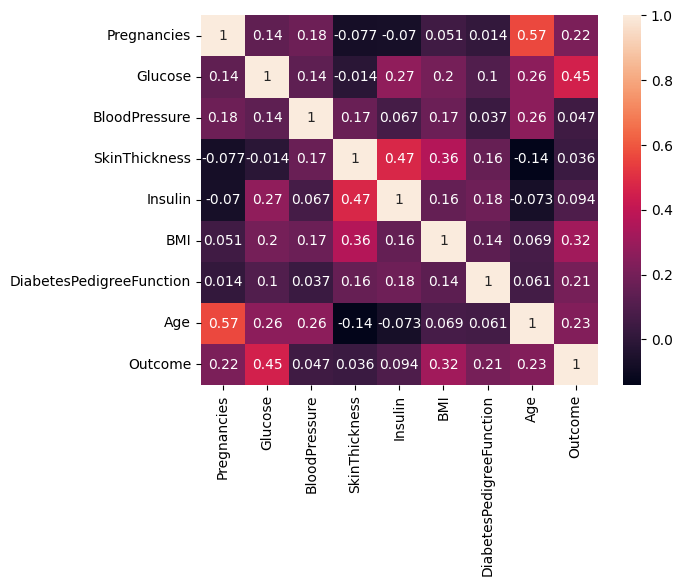

In [608]:
sns.heatmap(df.corr(),annot = True)
plt.show()

# Data Preprocessing

In [609]:
# Handling duplicate data
df = df.drop_duplicates()

In [610]:
# replacing zero value
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['Age'] = df['Age'].replace(0,df['Age'].median())

In [611]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


# Data Splitting

In [612]:
# divide the dataset into independent and dependent dataset
X = df.drop(columns = 'Outcome')
y = df['Outcome']
X.shape,y.shape

((718, 8), (718,))

In [613]:
data_columns = X.columns
data_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# Creating pipeline

In [614]:
numerical_pipeline = Pipeline(
        steps = [
            ('imputer',SimpleImputer(strategy = 'median')),
            ('scaler',StandardScaler())
        ]
)

In [615]:
preprocessor = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,data_columns)
])

In [616]:
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 20)
X_train.shape,X_test.shape

((502, 8), (216, 8))

In [617]:
y_train.shape,y_test.shape

((502,), (216,))

In [618]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Modeling

In [619]:
models = {
    'LogisticRegression':LogisticRegression(n_jobs = -1,random_state = 20),
    'RandomForestClassifier':RandomForestClassifier(oob_score = True,n_jobs = -1,random_state = 20),
    'AdaBoostClassifier':AdaBoostClassifier(random_state = 20),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state = 20),
    'XGBClassifier':XGBClassifier()
}

In [620]:
def model_evaluation(X_train,X_test,y_train,y_test,models):
    reports = {}

    for model_name,model in models.items():
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)

        accuracyScore = accuracy_score(y_test,y_test_pred)
        confusionMatrix = confusion_matrix(y_test,y_test_pred)
        classificationReport = classification_report(y_test,y_test_pred)

        reports[model_name] = [
            accuracyScore,
            confusionMatrix,
            classificationReport
        ]

    return reports

In [621]:
reports = model_evaluation(X_train,X_test,y_train,y_test,models)

In [622]:
for model_name,model_data in reports.items():
    print(f'Model : {model_name}')
    print(f'Accuracy score : {model_data[0]}')
    print(f'Confusion Matrix : \n{model_data[1]}')
    print(f'Classification Report : \n{model_data[2]}')

Model : LogisticRegression
Accuracy score : 0.7685185185185185
Confusion Matrix : 
[[131  15]
 [ 35  35]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.70      0.50      0.58        70

    accuracy                           0.77       216
   macro avg       0.74      0.70      0.71       216
weighted avg       0.76      0.77      0.76       216

Model : RandomForestClassifier
Accuracy score : 0.7962962962962963
Confusion Matrix : 
[[130  16]
 [ 28  42]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       146
           1       0.72      0.60      0.66        70

    accuracy                           0.80       216
   macro avg       0.77      0.75      0.76       216
weighted avg       0.79      0.80      0.79       216

Model : AdaBoostClassifier
Accuracy score : 0.7592592592592593
Confusion Matrix 

In [624]:
# import pickle

# model_objects = {
#     'preprocessor': preprocessor,
#     'models': models
# }

# file = open('model_objects.pkl','wb')
# pickle.dump(model_objects,file)

# print("Model object saved in model_objects.pkl")

Model object saved in model_objects.pkl
